In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report
import joblib
import shap
from sklearn.metrics import f1_score
import re
import seaborn as sns
shap.initjs()
import sys
from itertools import combinations
import networkx as nx
from matplotlib import cm
from matplotlib_venn import venn2, venn3, venn3_circles

In [2]:
def createObj(shap_object, ensembleSelected):
    shap_values = shap_object.values
    shap_importance = np.abs(shap_values).mean(0)
    shap_dict = dict(zip(ensembleSelected.feature_names_in_, shap_importance))
    expl_dictSummary = dict(zip(ensembleSelected.feature_names_in_, shap_importance))
    expl_sorted = dict(sorted(expl_dictSummary.items(), key=lambda item: item[1], reverse=True))
    return expl_sorted

shap_DatasetFull = joblib.load('../ShapValues/DatasetFull/ensembleSelected_shapValues.pkl')
shap_DatasetZeroes= joblib.load('../ShapValues/DatasetZeroes/ensembleSelected_shapValues.pkl')
shap_DatasetReduced = joblib.load('../ShapValues/DatasetReduced/ensembleSelected_shapValues.pkl')

ensembleSelected_DatasetFull = joblib.load('../Modelli/DatasetFull/ensembleSelected.pkl')
ensembleSelected_DatasetZeroes = joblib.load('../Modelli/DatasetZeroes/ensembleSelected_39.pkl')
ensembleSelected_DatasetReduced = joblib.load('../Modelli/DatasetReduced/ensembleSelected_373.pkl')


expl_sortedFull = createObj(shap_DatasetFull, ensembleSelected_DatasetFull)
expl_sortedZeroes = createObj(shap_DatasetZeroes, ensembleSelected_DatasetZeroes)
expl_sortedReduced = createObj(shap_DatasetReduced, ensembleSelected_DatasetReduced)

In [3]:
expl_Full = set(list(expl_sortedFull.keys())[:100])
expl_Zeroes = set(expl_sortedZeroes.keys())
expl_Reduced = set(list(expl_sortedReduced.keys())[:100])

In [9]:
set.intersection(expl_Reduced, expl_Zeroes)

{'CXCL2',
 'DDX3Y',
 'FRG1',
 'HLA-DRB1',
 'HLA-DRB5',
 'HNRNPA1',
 'RPS4Y1',
 'S100B',
 'STARD7',
 'USP25'}

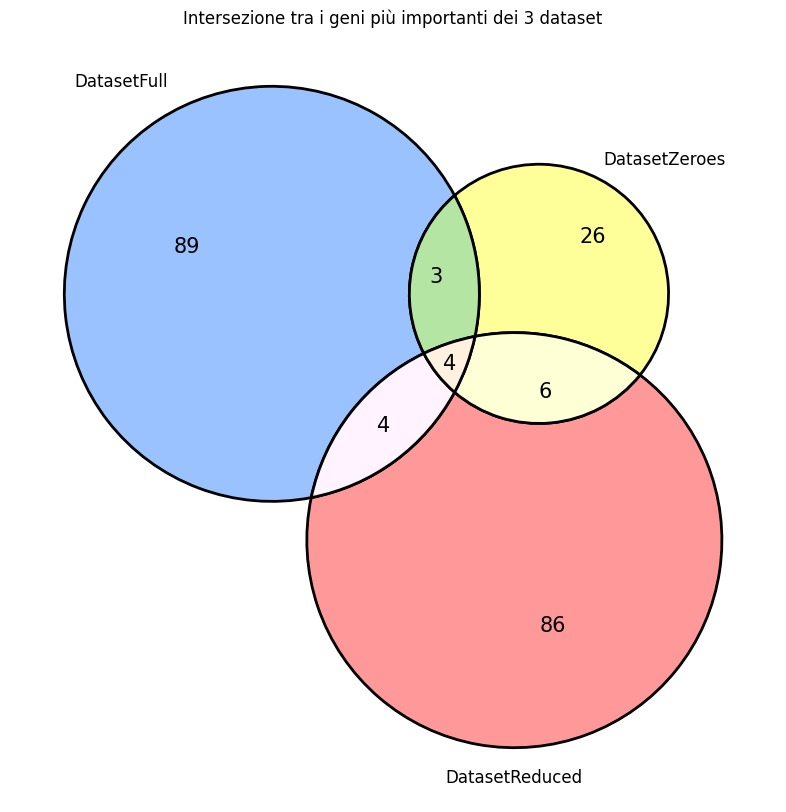

In [5]:
plt.figure(figsize=(12, 10))

venn = venn3([expl_Full, expl_Zeroes, expl_Reduced], ('DatasetFull', 'DatasetZeroes', 'DatasetReduced'), set_colors=('#99c2ff', '#ffff99', '#FF9999'), alpha=1)

venn.get_patch_by_id('110').set_alpha(1)
venn.get_patch_by_id('110').set_facecolor('#b4e5a2')  # Colore per l'intersezione

venn.get_patch_by_id('001').set_edgecolor('black')
venn.get_patch_by_id('001').set_linewidth(2) 
venn.get_patch_by_id('010').set_edgecolor('black')
venn.get_patch_by_id('010').set_linewidth(2)
venn.get_patch_by_id('100').set_edgecolor('black')
venn.get_patch_by_id('100').set_linewidth(2)
venn.get_patch_by_id('110').set_edgecolor('black')
venn.get_patch_by_id('110').set_linewidth(2)
venn.get_patch_by_id('101').set_edgecolor('black')
venn.get_patch_by_id('101').set_linewidth(2)
venn.get_patch_by_id('011').set_edgecolor('black')
venn.get_patch_by_id('011').set_linewidth(2)
venn.get_patch_by_id('111').set_edgecolor('black')
venn.get_patch_by_id('111').set_linewidth(2)


venn.subset_labels[0].set_fontsize(15)
venn.subset_labels[1].set_fontsize(15)
venn.subset_labels[2].set_fontsize(15)
venn.subset_labels[3].set_fontsize(15)
venn.subset_labels[4].set_fontsize(15)
venn.subset_labels[5].set_fontsize(15)
venn.subset_labels[6].set_fontsize(15)

plt.title("Intersezione tra i geni più importanti dei 3 dataset")
plt.show()

In [4]:
ablation_DatasetFull = ['GIT2', 'TPM1', 'HLA-DRB5', 'TSPAN32', 'HLA-DRB1', 'RPL23', 'EEF1A1', 'EIF4G2', 'PPM1A', 'PAK2', 'MXI1', 'TXNRD1', 'MYL4', 'ZBTB5', 'THADA', 'CHMP6', 'CDKN2D', 'PLK3', 'CD6', 'ZNF606', 'MTRF1L', 'LILRA5', 'IRAK3', 'MYBL2', 'ETAA1', 'ARHGAP25', 'UBB', 'SSH1', 'SUCLG2', 'WDR1', 'GTPBP2', 'ICOSLG', 'MSH3', 'RPL41', 'DPP4', 'C1RL', 'TFE3', 'SERPINB9', 'CUBN', 'MRPS33', 'OSBPL10', 'BRF2', 'PDGFB', 'RPS11', 'ADAM8', 'GPHN', 'HOXA5', 'CAND1', 'PELI2', 'SRP72', 'POLD3', 'EPB41', 'MCOLN1', 'DHRS7', 'TOM1L2', 'SLC29A1', 'GPBP1L1', 'TUBA8', 'TSPAN5', 'PTCD2', 'CA2', 'GLRX5', 'RDH11', 'LCOR', 'DDX42', 'MYEF2', 'NSUN3', 'RAP2C', 'CBX3', 'TRIM27', 'VRK3', 'PFDN5', 'MMP25', 'DDX3Y', 'TFDP1', 'CRKL', 'WRNIP1', 'BRD3', 'AQP9', 'HBD', 'PDK1', 'PRKAR2A', 'USP33', 'JUND', 'TCF3', 'FAM20B', 'HEXIM1', 'DDX17', 'CAST', 'MFN2', 'HUWE1', 'WDFY3', 'OSBPL1A', 'TSPAN2', 'NDST1', 'SPATA6', 'SERPINB8', 'FARSA', 'SLCO3A1', 'PDZD8', 'EXTL3']
ablation_DatasetZeroes = ['HLA-DRB5', 'FBLN2', 'HLA-DRB1', 'DDX17', 'TPM1', 'ZNF611', 'DDX3Y', 'RFTN1', 'LIMS1', 'S100B', 'RMC1', 'ARHGEF12', 'GALT', 'FRG1', 'ZBTB48', 'TNRC6B']
ablation_DatasetReduced = ['HLA-DRB1', 'PABPC1', 'SPATA1', 'TRMT5', 'DDX3Y', 'UBR4', 'HNRNPA1', 'RPL28', 'APOO', 'SIT1', 'PHB2', 'GLRA2', 'EXOSC8', 'APOC1', 'CLEC2B', 'FSHB', 'HLA-DRB5', 'USP25', 'VDAC3', 'NIPSNAP3B', 'CTNNBL1', 'RAB5IF', 'STARD7', 'PPIA', 'JPT1', 'BAZ1B', 'MIR22HG', 'RPS2', 'FKBP11', 'LRRC59', 'APOBEC3F', 'TMED5', 'GALNT1', 'GIT2', 'PFDN5', 'RPL13A', 'GAPDH', 'NACA2']

ablation_Full = set(ablation_DatasetFull)
ablation_Zeroes = set(ablation_DatasetZeroes)
ablation_Reduced = set(ablation_DatasetReduced)

In [5]:
print(set.intersection(ablation_Full, ablation_Zeroes, ablation_Reduced))
print(set.intersection(ablation_Full, ablation_Zeroes))
print(set.intersection(ablation_Full, ablation_Reduced))

{'HLA-DRB1', 'HLA-DRB5', 'DDX3Y'}
{'DDX3Y', 'HLA-DRB1', 'HLA-DRB5', 'TPM1', 'DDX17'}
{'PFDN5', 'DDX3Y', 'HLA-DRB1', 'HLA-DRB5', 'GIT2'}


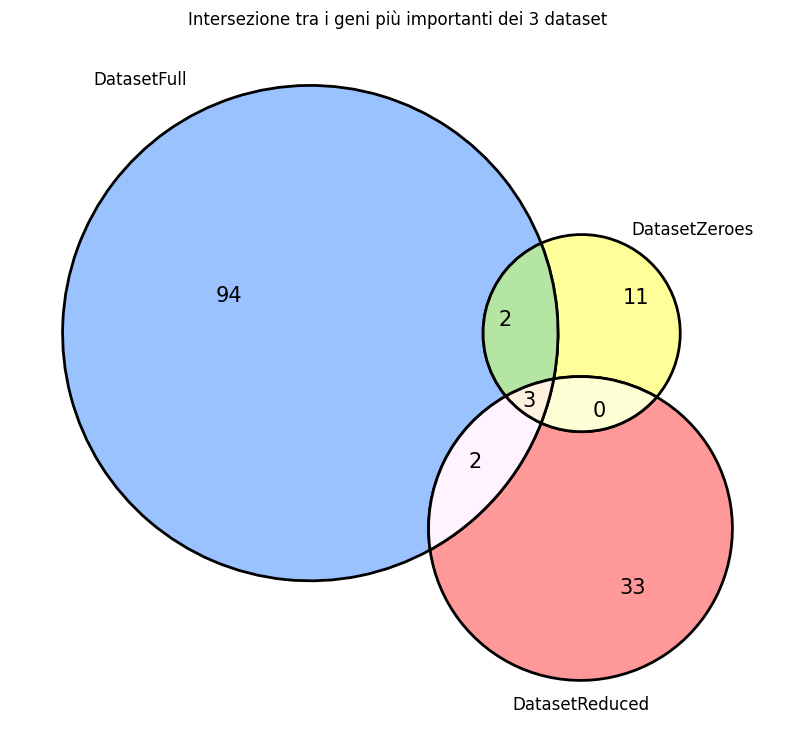

In [18]:
plt.figure(figsize=(10, 10))

venn = venn3([ablation_Full, ablation_Zeroes, ablation_Reduced], ('DatasetFull', 'DatasetZeroes', 'DatasetReduced'), set_colors=('#99c2ff', '#ffff99', '#FF9999'), alpha=1)

venn.get_patch_by_id('110').set_alpha(1)
venn.get_patch_by_id('110').set_facecolor('#b4e5a2')  # Colore per l'intersezione

venn.get_patch_by_id('001').set_edgecolor('black')
venn.get_patch_by_id('001').set_linewidth(2) 
venn.get_patch_by_id('010').set_edgecolor('black')
venn.get_patch_by_id('010').set_linewidth(2)
venn.get_patch_by_id('100').set_edgecolor('black')
venn.get_patch_by_id('100').set_linewidth(2)
venn.get_patch_by_id('110').set_edgecolor('black')
venn.get_patch_by_id('110').set_linewidth(2)
venn.get_patch_by_id('101').set_edgecolor('black')
venn.get_patch_by_id('101').set_linewidth(2)
venn.get_patch_by_id('011').set_edgecolor('black')
venn.get_patch_by_id('011').set_linewidth(2)
venn.get_patch_by_id('111').set_edgecolor('black')
venn.get_patch_by_id('111').set_linewidth(2)


venn.subset_labels[0].set_fontsize(15)
venn.subset_labels[1].set_fontsize(15)
venn.subset_labels[2].set_fontsize(15)
venn.subset_labels[3].set_fontsize(15)
venn.subset_labels[4].set_fontsize(15)
venn.subset_labels[5].set_fontsize(15)
venn.subset_labels[6].set_fontsize(15)

plt.title("Intersezione tra i geni più importanti dei 3 dataset")
plt.show()

In [7]:
print(set.intersection(ablation_Reduced, expl_Reduced))

{'PFDN5', 'STARD7', 'RPL28', 'GAPDH', 'UBR4', 'GLRA2', 'GIT2', 'TMED5', 'USP25', 'HLA-DRB5', 'NACA2', 'APOC1', 'PABPC1', 'DDX3Y', 'NIPSNAP3B', 'HLA-DRB1', 'APOBEC3F', 'HNRNPA1', 'VDAC3', 'RAB5IF', 'PPIA', 'SPATA1', 'TRMT5', 'CLEC2B', 'LRRC59'}


In [1]:
graph1_Full = ['PAK2', 'RPL41', 'HLA-DRB1', 'DDX3Y', 'HLA-DRB5', 'WRNIP1', 'AQP9', 'SERPINB9', 'DDX17', 'TXNRD1', 'PDK1', 'EEF1A1', 'CHMP6', 'HBD', 'GIT2', 'EIF4G2', 'PRKAR2A', 'RPL23', 'TCF3', 'HEXIM1']
graph2_Full = ['RPL23','GIT2','ARHGAP4','DDX3Y','UTY','ASAH1','TXNL1','UQCRFS1','SEMA4D','EIF4G2','SERF2','DDX17','RPS29','SETD6','ENTPD4','SERPINB9','RRM1','DNMT1','CD59']
graph3_Full = ['SERPINB9', 'RPL41', 'HLA-DRB5', 'HBD', 'EEF1A1', 'HEXIM1', 'PRKAR2A', 'EIF4G2', 'TXNRD1', 'TCF3', 'AQP9', 'CHMP6', 'HLA-DRB1', 'PDK1', 'DDX17', 'WRNIP1', 'DDX3Y', 'PAK2', 'GIT2', 'RPL23']

graph1_Reduced = ['RPL28', 'APOBEC3F', 'TRMT5', 'PABPC1', 'NACA2', 'PPIA', 'USP25', 'PFDN5', 'HLA-DRB1', 'DDX3Y', 'CLEC2B', 'LRRC59', 'NIPSNAP3B', 'UBR4', 'GLRA2', 'APOC1', 'HNRNPA1', 'HLA-DRB5', 'VDAC3', 'STARD7', 'SPATA1', 'TMED5', 'GIT2', 'GAPDH', 'RAB5IF']
graph2_Reduced = ['DDX3Y', 'USP9Y', 'PABPC1', 'GIT2', 'RPS4Y1', 'C4BPA', 'HLA-DRB1', 'CXCL2', 'UBR4', 'RPL28', 'S100B', 'BTNL3', 'IL22', 'CRIPTO', 'TRMT5', 'HLA-DRB5', 'KCNE2', 'GAPDH', 'ZFY', 'RPS28', 'UGT2B28']
graph3_Reduced = ['RPL28', 'APOBEC3F', 'TRMT5', 'PABPC1', 'NACA2', 'PPIA', 'USP25', 'PFDN5', 'HLA-DRB1', 'DDX3Y', 'CLEC2B', 'LRRC59', 'NIPSNAP3B', 'UBR4', 'GLRA2', 'APOC1', 'HNRNPA1', 'HLA-DRB5', 'VDAC3', 'STARD7', 'SPATA1', 'TMED5', 'GIT2', 'GAPDH', 'RAB5IF']

graph1_Zeroes = ['HLA-DRB5', 'RFTN1', 'TNRC6B', 'S100B', 'DDX3Y', 'LIMS1', 'ARHGEF12', 'FBLN2', 'RMC1', 'HLA-DRB1', 'TPM1', 'DDX17', 'ZBTB48', 'GALT', 'ZNF611', 'FRG1']
graph2_Zeroes = ['DDX3Y', 'HLA-DRB5', 'MAP3K11', 'FRG1', 'HNRNPA1', 'RFTN1', 'LIMS1', 'HLA-DRB1', 'BLCAP', 'CALML4', 'ZBTB48', 'STARD7', 'RMC1', 'CS', 'ARHGEF12', 'SLC23A2', 'CXCL2', 'CLU', 'RHOB', 'MSR1', 'SASH3', 'MFN2', 'RPS4Y1', 'RBM14', 'ZBTB7A']
graph3_Zeroes = ['HLA-DRB5', 'RFTN1', 'TNRC6B', 'S100B', 'DDX3Y', 'LIMS1', 'ARHGEF12', 'FBLN2', 'RMC1', 'HLA-DRB1', 'TPM1', 'DDX17', 'ZBTB48', 'GALT', 'ZNF611', 'FRG1']

set1_Full = set(graph1_Full)
set2_Full = set(graph2_Full)
set3_Full = set(graph3_Full)

set1_Reduced = set(graph1_Reduced)
set2_Reduced = set(graph2_Reduced)
set3_Reduced = set(graph3_Reduced)

set1_Zeroes = set(graph1_Zeroes)
set2_Zeroes = set(graph2_Zeroes)
set3_Zeroes = set(graph3_Zeroes)

intersection_Full = set.intersection(set1_Full, set2_Full, set3_Full)
intersection_Reduced = set.intersection(set1_Reduced, set2_Reduced, set3_Reduced)
intersection_Zeroes = set.intersection(set1_Zeroes, set2_Zeroes, set3_Zeroes)

intersection_Biogrid = set.intersection(set1_Full, set1_Reduced, set1_Zeroes)
intersection_ShapCorr = set.intersection(set2_Full, set2_Reduced, set2_Zeroes)
intersection_BestCorr = set.intersection(set3_Full, set3_Reduced, set3_Zeroes)

print("Intersezione dei geni delle reti su DatasetFull: " + str(intersection_Full))
print("Intersezione dei geni delle reti su DatasetReduced: " + str(intersection_Reduced))
print("Intersezione dei geni delle reti su DatasetZeroes: " + str(intersection_Zeroes))

print("Intersezione dei geni delle reti costruite con BioGRID: " + str(intersection_Biogrid))
print("Intersezione dei geni delle reti costruite a partire da SHAP + correlazione: " + str(intersection_ShapCorr))
print("Intersezione dei geni delle reti costruite a partire da SHAP e Ablation + correlazione: " + str(intersection_BestCorr))

print(set.intersection(intersection_Full, intersection_Reduced, intersection_Zeroes))
print(set.intersection(intersection_Biogrid, intersection_ShapCorr, intersection_BestCorr))


Intersezione dei geni delle reti su DatasetFull: {'EIF4G2', 'SERPINB9', 'GIT2', 'RPL23', 'DDX17', 'DDX3Y'}
Intersezione dei geni delle reti su DatasetReduced: {'DDX3Y', 'PABPC1', 'GIT2', 'UBR4', 'HLA-DRB1', 'TRMT5', 'GAPDH', 'HLA-DRB5', 'RPL28'}
Intersezione dei geni delle reti su DatasetZeroes: {'RFTN1', 'FRG1', 'ARHGEF12', 'RMC1', 'HLA-DRB1', 'LIMS1', 'HLA-DRB5', 'DDX3Y', 'ZBTB48'}
Intersezione dei geni delle reti costruite con BioGRID: {'DDX3Y', 'HLA-DRB1', 'HLA-DRB5'}
Intersezione dei geni delle reti costruite a partire da SHAP + correlazione: {'DDX3Y'}
Intersezione dei geni delle reti costruite a partire da SHAP e Ablation + correlazione: {'DDX3Y', 'HLA-DRB1', 'HLA-DRB5'}
{'DDX3Y'}
{'DDX3Y'}


In [6]:
dea_Full = ['THADA', 'DDX42', 'GIT2', 'BLCAP', 'TXNRD1', 'EEF1A1', 'RPL4', 'SRP72', 'HUWE1', 'ATF2', 'TAPT1', 'EIF4G2', 'PMS1', 'TUBA1B', 'MTA2', 'FBLN2', 'KPNA4', 'TIA1', 'USP25', 'TMED5', 'CCNT1', 'PIK3C3', 'AKAP13', 'RFTN1', 'UBR2', 'POLH', 'PKN2', 'TERF2', 'DDX3X', 'LITAF', 'ARID1A']
dea_Reduced = ['RAB11FIP4', 'SEMA4D', 'NPM1', 'HLA-DRB1', 'GIT2', 'PABPC1', 'CHST6', 'WWC3', 'HPRT1', 'SLC25A3', 'ATP5MC3', 'ALDOA', 'ZKSCAN8', 'DHRS7', 'HEXA', 'EIF4EBP2', 'KDM5B', 'TXNRD1', 'PIAS2', 'RPL4', 'AGK', 'GAPDH', 'PPIA', 'SRP72', 'DIAPH1', 'RPL13A', 'RPS10', 'RPS15', 'TAPT1', 'EIF4G2', 'MACROH2A1', 'USP25', 'TMED5', 'FLCN', 'LRRC59', 'TRMT5', 'SRSF9', 'HNRNPA1', 'IL24', 'VPS45', 'AKAP13', 'RFTN1', 'NDUFA10', 'RPL28', 'RPL27A', 'UBR4', 'RPS28', 'LATS1', 'PKN2', 'P4HB', 'PSMB4', 'SPATA1', 'RPL37A', 'RPS3', 'CYB5R1', 'VDAC2', 'FTH1P5', 'WIPI2', 'PABPC3', 'LITAF', 'PTPN11', 'EEF1A1.1', 'ARID1A']
dea_Zeroes = ['SEMA4D', 'HLA-DRB1', 'PABPC1', 'FAM50A', 'ATP5MC3', 'ZKSCAN8', 'CUEDC2', 'PSMC3IP', 'RPL4', 'SRP72', 'DIAPH1', 'RPL13.1', 'RPS15', 'HLA-DRB5', 'MACROH2A1', 'SAT1', 'LRRC59', 'TRMT5', 'ZNHIT1', 'HNRNPA1', 'IL24', 'AKAP13', 'ELOVL5', 'NDUFA10', 'UBR4', 'RPS28', 'LATS1', 'PSMB4', 'SPATA1', 'FTH1P5', 'WIPI2']

setDea_Full = set(dea_Full)
setDea_Reduced = set(dea_Reduced)
setDea_Zeroes = set(dea_Zeroes)

print(set.intersection(setDea_Full, intersection_Full))
print(set.intersection(setDea_Reduced, intersection_Reduced))
print(set.intersection(setDea_Zeroes, intersection_Zeroes))

{'GIT2', 'EIF4G2'}
{'PABPC1', 'GIT2', 'UBR4', 'HLA-DRB1', 'TRMT5', 'GAPDH', 'RPL28'}
{'HLA-DRB1', 'HLA-DRB5'}
